# План работы над проектом

1. Изучить текущий набор данных
    
2. Произвести предобработку данных:    
   2.1 Заполняем пропуски в столбцах, важных для дальнейшей работы  
   2.2 Ищем и удаляем дубликаты в данных     
   2.3 Меняем типы данных      
3. Находим цену 1 квадратного метра 
4. Выделяем день недели, месяц и год публикации каждого объявления
    
5. Опреляем этажи квартир: варианты — первый, последний, другой;
    
6. Определяем соотношение жилой и общей площади, а также отношение площади кухни к общей
    
7. Проводим исследовательский анализ данных по инстуркции
    
8. Пишем общий вывод по проекту  


### Шаг 1 Откройте файл с данными и изучите общую информацию

In [2]:
import pandas as pd #будет работать используя библиотеку pandas, разделим данные на столбцы
import matplotlib.pyplot as plt #вызываем библиотеку для более удобной работы с графиками и гистограммами
df = pd.read_csv('/content/real_estate_data.csv', sep = '\t') 
df.info() #выводим общюю информацию по данным
# отображаем все столбцы
pd.options.display.max_columns = 40
import warnings
warnings.filterwarnings('ignore')
df.sample(10)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

1. Пропуски с высотой потолков ничем не заполняем, так как данный параметр не является важным для ответа на ключевой вопрос исследования. Пропуски составляют 53% всей выборки, при этом данный параметр не корреклирует в достаточной степени ни с одним из других значений в таблице.
2. Пропуски с кол-вом этажей в доме составляют 86шт или 0,4%  от всех строк. Данные значения можно заменить на медианные, то есть 9 этажей. 
3. Пропуски с жилой площадью составили 8% или 1903 строк, а с площадью кухни 10% или 2276 строк. Данные параметры необходимы для ответа на вопросы задачи. Удалить их нельзя, так как их весьма много и итоговые данные исказятся, соответственно пропуски необходимо заполнить медианными значениями
4. Пропуски имеются и в столбце с балконами. В 11 519 строк нет информации о наличии балкона. Скорее всего, в таком случае их 0. Поэтому делаем замену пустых значений на 0. Кроме того, кол-во балконов не коррелирует ни с одной другой величиной явно.

Вероятно, раз кол-во балконов и высота потолков заполнялись при публикации объявления людьми и примерно в 50% этих данных нет, данные поля были не обязательными при заполнении. 

### Шаг 2. Предобработка данных

In [3]:
#заполняем пустоты в столбцах living_area и kitchen_area
df['living_area_ratio'] = df['living_area'] / df['total_area'] #создаем новый столбец с долей жилой площади
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area'] #создаем новый столбец с долей кухонной площади
#данные по пунктам выше отвечают на пункт номер 6 в плане
df.corr() #выясняем зависимость между этими показателями и прочими значениями таблицы
# Доля площади квартир от жилой площади / от кухонной площади напрямую коррелирует с кол-вом комнат
living_area_ratio = df.groupby('rooms')['living_area_ratio'].median() #сгруппируем по кол-ву комнат и определим медиану, создадим словарь
kitchen_area_ratio = df.groupby('rooms')['kitchen_area_ratio'].median() #аналогично
df['living_area'] = df['living_area'].fillna(df['rooms'].map(living_area_ratio)*df['total_area']) 
df['kitchen_area'] = df['kitchen_area'].fillna(df['rooms'].map(kitchen_area_ratio)*df['total_area'])

In [4]:
#заполняем пропуск в столбце floors_total
median_floors_total = df['floors_total'].median() #менее 1% пропусков, заполняем медианным значением по столбцу
df['floors_total'] = df['floors_total'].fillna(median_floors_total) 
df.duplicated() #ищем дубликаты - не найдены

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Length: 23699, dtype: bool

In [5]:
df['balcony'] = df['balcony'].fillna(0) #заменяем пропуски в столбце с балконами на 0

In [6]:
df['is_apartment'] = df['is_apartment'].fillna(False) #заменяем пропуски в столбце с обозначением аппартаментов на False

In [7]:
#заменяем тип данных для увеличения быстродействия
df['total_area'] = df['total_area'].astype('int64')
df['floors_total'] = df['floors_total'].astype('int64')
df['living_area'] = df['living_area'].astype('int64')
df['balcony'] = df['balcony'].astype('int64')

In [8]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
#заменяем пропуски на медианное значение, пропусков при этом 14%. однако данный показатель не корреклирует в достаточной завизивимости с другими, поэтому менеям на простую медиану

In [9]:
df['days_exposition'] = df['days_exposition'].astype('int64')

In [10]:
df['price_of_1_square_meter'] = df['last_price'] / df['total_area'] #находим цену 1 квадратного метра, выполняя ответ на пункт номер 3

In [11]:
df['price_of_1_square_meter'] = df['price_of_1_square_meter'].astype('int64')

In [12]:
#выполняем пункт номер 4 - Выделяем день недели, месяц и год публикации каждого объявления
import datetime #вызывыаем библиотеку для работы со столбцом со временем
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S') #меняем формат отображения даты
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday #добавляем столбец с порядковым номером дня в недеде
df['month_exposition'] = df['first_day_exposition'].dt.month #добавляем столбец с порядковым номером месяца в недеде
df['year_exposition'] = df['first_day_exposition'].dt.year #добавляем столбец с порядковым номером года в недеде
#добавляем столбец с наименованием этажа (первый, последний или другой)
df
def floor_name(value):
    floor = value['floor']
    floors_total = value['floors_total']
    if floor == 1:
        return "первый"
    if floor == floors_total:
        return "последний"         
    return "другой"
df['floor_name'] = df.apply(floor_name, axis=1)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,price_of_1_square_meter,weekday_exposition,month_exposition,year_exposition,floor_name
0,20,13000000.0,108,2019-03-07,3,2.70,16,51,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95,0.472222,0.231481,120370,3,3,2019,другой
1,7,3350000.0,40,2018-12-04,1,NaN,11,18,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,0.460396,0.272277,83750,1,12,2018,первый
2,10,5196000.0,56,2015-08-20,2,NaN,5,34,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,0.612500,0.148214,92785,3,8,2015,другой
3,0,64900000.0,159,2015-07-24,3,NaN,14,100,9,False,False,False,20.442857,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,NaN,NaN,408176,4,7,2015,другой
4,2,10000000.0,100,2018-06-19,2,3.03,14,32,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,0.320000,0.410000,100000,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133,2017-03-21,3,3.70,5,73,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,95,0.547792,0.103356,72932,1,3,2017,другой
23695,14,3100000.0,59,2018-01-15,3,NaN,5,38,4,False,False,False,8.500000,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45,0.644068,0.144068,52542,0,1,2018,другой
23696,18,2500000.0,56,2018-02-11,2,NaN,3,29,1,False,False,False,9.132958,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,95,0.523810,NaN,44642,6,2,2018,первый
23697,13,11475000.0,76,2017-03-28,2,3.00,17,44,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602,NaN,0.303583,150986,1,3,2017,другой


### Вывод

1. Введу большого объема данных и части ручного их ввода, есть большая доля пропущенных значений во многих столбцах
2. Для того, чтобы их минимизировать необходимо сделать обязательными для заполнения значения жилой площади и площади кухни, как пример

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

count    23699.000000
mean        34.426642
std         22.836103
min          2.000000
25%         18.000000
50%         30.000000
75%         42.000000
max        430.000000
Name: living_area, dtype: float64

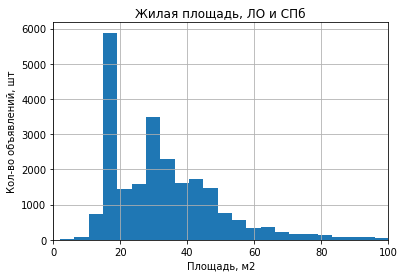

In [13]:
#анализируем ряд параметров через метод desctibe и гистограммы 
df.hist('living_area', bins = 100)
plt.xlim(0,100)
plt.title('Жилая площадь, ЛО и СПб') #назовем график
plt.ylabel('Кол-во объявлений, шт') #назовем сторону y
plt.xlabel('Площадь, м2') #назовем сторону x
df['living_area'].describe()

Средний метраж, продаваемых квартир в Санкт-Петербурге и Лен области равен 34,7 м2; минимальная квартира - 2 м2, а самая большая 430 м2. Самая распространенная площадью квартиры от 18 до 42х м2. При этом более 5000 объявлений представлено на квартиры до 20 кв м (квартиры-студии или комнаты) 

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

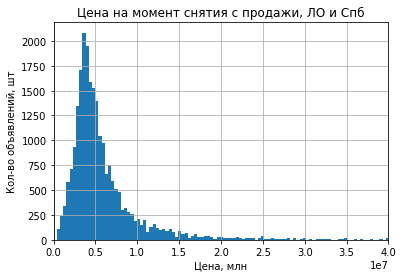

In [14]:
df.hist('last_price', bins = 2000)
plt.xlim(0,40000000)
plt.title('Цена на момент снятия с продажи, ЛО и Спб') #назовем график
plt.ylabel('Кол-во объявлений, шт') #назовем сторону y
plt.xlabel('Цена, млн') #назовем сторону x
df['last_price'].describe()

Средний цена, продаваемых квартир в Санкт-Петербурге и Лен области равна 6,5 млн р. 

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

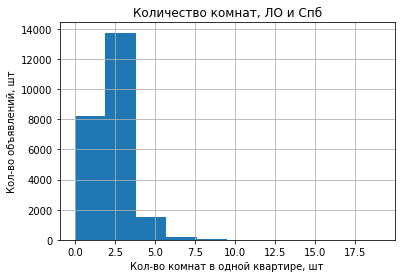

In [15]:
df.hist('rooms', bins = 10)
plt.title('Количество комнат, ЛО и Спб') #назовем график
plt.ylabel('Кол-во объявлений, шт') #назовем сторону y
plt.xlabel('Кол-во комнат в одной квартире, шт') #назовем сторону x
df['rooms'].describe()

В среднем в Санктр-Петербруге и Лен. области продаются через Яндекс.Недвижимость квартиры с 2мя комнатами. Однако и была на продаже квартира с 19ю комнатами. Средний диапазон находится в пределах от 1 до 3х комнат

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

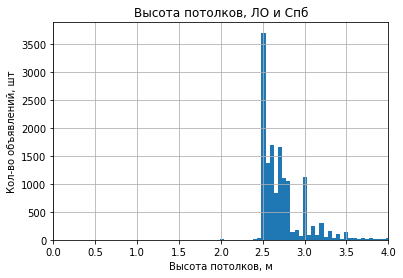

In [16]:
df.hist('ceiling_height', bins = 2000)
plt.xlim(0,4)
plt.title('Высота потолков, ЛО и Спб') #назовем график
plt.ylabel('Кол-во объявлений, шт') #назовем сторону y
plt.xlabel('Высота потолков, м') #назовем сторону x
df['ceiling_height'].describe()

Средняя высота потолков продаваемых квартир составляет 2,7 м, норма вцелом находится от 2,5 до 2,8 м. В наборе данных есть значения более 10 м2, что скорее всего является ошибкой в вводе со стороны пользователей и была пропущена запятая. Также ошибкой скорее всего является высота потолков в 1м.

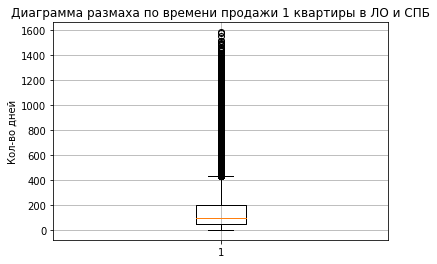

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [17]:
# изучаем продажи квартиры
plt.boxplot(df['days_exposition']) #строим диаграмму размаха 
plt.title('Диаграмма размаха по времени продажи 1 квартиры в ЛО и СПБ') #назовем график
plt.ylabel('Кол-во дней') #назовем сторону y
plt.grid()
plt.show()
df['days_exposition'].describe()

Продажа 1 квартиры в среднем занимает 180 дней. Медианное значение при этом равно 95 дням, между данными цифрами разница почти в 2 раза введу большого стандартного отклонения в 219 дней, то есть наличия квартир, которые очень долго продавались.
Обычно продажа квартиры занимает от 45 до 199 дней, при этом можно считать, что если продажа квартиры осуществляется до 45 дней - это быстро, если более 420 - аномально долго. 

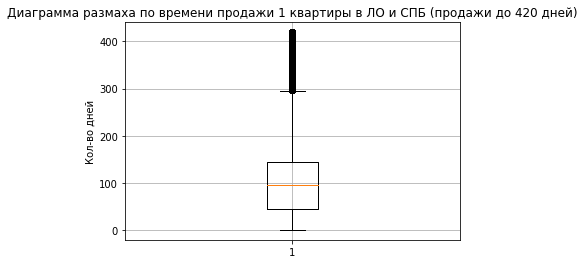

count    21270.000000
mean       111.805407
std         94.777488
min          1.000000
25%         45.000000
50%         95.000000
75%        145.000000
max        419.000000
Name: days_exposition, dtype: float64

In [18]:
sales_without_anomalies = df.query('days_exposition < 420') #убираем значения более 420
plt.boxplot(sales_without_anomalies['days_exposition'])
plt.title('Диаграмма размаха по времени продажи 1 квартиры в ЛО и СПБ (продажи до 420 дней)')
plt.ylabel('Кол-во дней') #назовем сторону y
plt.grid()
plt.show()
sales_without_anomalies['days_exposition'].describe()

При этом, для корректности определения нормы, лучше убрать столь крупные аномалии. Тем самым нормой для продажи квартиры станет диапазон от 45 до 145 дней, все что быстрее 45 дней - удачей и быстрой продажей, а все что дольше 295 дней - аномально долго 


In [19]:
#изучаем через коэффициент корреляции Пирсона что влияет на продажу квартиры
df[['last_price', 'rooms', 'living_area', 'cityCenters_nearest']].corr()
#определяем зависимость цены квартиры от кол-ва комнат, жилой площади и близости к центру

,last_price,rooms,living_area,cityCenters_nearest
last_price,1.000000,0.363343,0.586214,-0.206747
rooms,0.363343,1.000000,0.825625,-0.184864
living_area,0.586214,0.825625,1.000000,-0.227929
cityCenters_nearest,-0.206747,-0.184864,-0.227929,1.000000


Стоимость квартиры зависит напрямую на 36,3% от кол-ва в ней комнат и на 58,6% от жилой площади и имеет обратную зависимость на 20,7% от близости к центру. То есть, чем ближе к центру, тем выше цена квартиры. 

In [20]:
df[['last_price','weekday_exposition', 'month_exposition','year_exposition','floor_name']].corr() 
#определяем зависимость цены продажи квартиры от дня недели, месяца и года

,last_price,weekday_exposition,month_exposition,year_exposition
last_price,1.000000,0.001550,0.002779,-0.043089
weekday_exposition,0.001550,1.000000,0.011496,-0.004799
month_exposition,0.002779,0.011496,1.000000,-0.269642
year_exposition,-0.043089,-0.004799,-0.269642,1.000000


Зависимость между ценой квартиры и днем недели при размещении или месяцем не наблюдается. Однако стоить отметить, что с годами цена на квартиры девешевеет от 4,3%

In [21]:
#корреляцию можем опделеить только, если в столбце имеются цифры, а не слова, потому проводим замену
df['floor_name'] = df['floor_name'].replace('первый', '10')
df['floor_name'] = df['floor_name'].replace('последний', '20')
df['floor_name'] = df['floor_name'].replace('другой', '30')
df['floor_name'] = df['floor_name'].astype('float64') #производим замену формата столбца на числовой
df[['last_price','floor_name']].corr()
first_floor = df.query('floor_name == "10" or floor_name == "30"') #смотрим на корреляцию с 1м и другими этажами
first_floor[['last_price','floor_name']].corr()

,last_price,floor_name
last_price,1.000000,0.079736
floor_name,0.079736,1.000000


Вцелом зависимость цены квартиры от этажа прямая и составляет 4%, при этом разница межу первым и любым другим этажом еще в 4%, то есть цена квартиры будет выше, если она расположена не на 1 этаже на 8%.

In [22]:
#изучаем 10 населенных пунктов с самым большим кол-вом публикакий
ten_cities = df.pivot_table(index = 'locality_name', values = 'last_price', aggfunc = ('median','count')) #создаем отдельную таблицу с названием населенного пункта и по стоимости квартиры. Там считаем медиану, также добавляем столбец с кол-ком объявлений в каждом городе
ten_cities.sort_values(by = 'count', ascending = False).head(10) #сортируем таблицу по кол-ву объявлений и выделяем 10 с их наибольшим кол-вом

,count,median
locality_name,,
Санкт-Петербург,15721,5500000.0
посёлок Мурино,522,3400000.0
посёлок Шушары,440,3950000.0
Всеволожск,398,3450000.0
Пушкин,369,5180000.0
Колпино,338,3600000.0
посёлок Парголово,327,4100000.0
Гатчина,307,3100000.0
деревня Кудрово,299,3790000.0


<div class="alert alert-block alert-success">
<b>Success:</b> отличная работа!

Среди 10 населенных пунктов, по которым больше всего объявлений, самая высокая стоимость жилья в Санкт-Петербурге, где медианное значение равно 5 500 000р. На втором месте Пушкин - 5 180 000р, на последнем же месте Гатчина - 3 100 000р 

In [23]:
#изучаем среднюю цену квадратного метра квартиры в Санкт-Петербурге в зависимости от близости к центру города
only_spb = df.query('locality_name == "Санкт-Петербург"') #создаем новую таблицу, где представлен только город Санкт-Петербург
only_spb['cityCenters_nearest_km'] = only_spb['cityCenters_nearest'] / 1000 #создаем столбец с данными до центра в км
only_spb['cityCenters_nearest_km'] = only_spb['cityCenters_nearest_km'].fillna(only_spb['cityCenters_nearest_km'].median()).round() #заменяем пустые значения на медианные, т.к. их всего 61, а также округляем данные в столбце
average_price_per_km = only_spb.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = ('mean','count')).round() #создаем таблицу со средней ценой квартиры на каждом километре в Санкт-Петербурге
average_price_per_km

,count,mean
cityCenters_nearest_km,,
0.0,27,31449116.0
1.0,192,21206721.0
2.0,310,17788320.0
3.0,350,11126581.0
4.0,688,13304280.0
5.0,920,14499121.0
6.0,618,15338418.0
7.0,420,14775153.0
8.0,597,9957717.0


Text(0.5, 0, 'Км от центра Санкт-Петербурга')

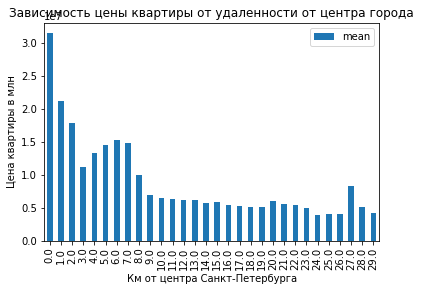

In [24]:
#определяем зону центра города в Санкт-Петербурге
average_price_per_km.plot(kind = 'bar', y = 'mean') #отобразим график для ответа на вопрос
plt.title('Зависимость цены квартиры от удаленности от центра города') #назовем график
plt.ylabel('Цена квартиры в млн') #назовем сторону y
plt.xlabel('Км от центра Санкт-Петербурга') #назовем сторону x


Расстояние до 7 км включительно можно считать центром города

In [25]:
#изучаем сегмент квартир в центре
only_spb_center = only_spb.query('cityCenters_nearest_km <=7') #выделяем сегмент квартир в центре
only_spb_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,price_of_1_square_meter,weekday_exposition,month_exposition,year_exposition,floor_name,cityCenters_nearest_km
3,0,64900000.0,159,2015-07-24,3,NaN,14,100,9,False,False,False,20.442857,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,NaN,NaN,408176,4,7,2015,30.0,7.0
24,8,6500000.0,97,2015-10-31,2,NaN,3,46,1,False,False,False,19.600000,0,Санкт-Петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265,0.478395,0.201646,67010,5,10,2015,10.0,2.0
35,6,15500000.0,149,2017-06-26,5,NaN,5,104,4,False,False,False,17.000000,0,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644,0.697987,0.114094,104026,0,6,2017,30.0,4.0
51,7,45000000.0,161,2017-10-17,3,3.20,8,38,4,False,False,False,50.000000,0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541,0.236025,0.310559,279503,1,10,2017,30.0,7.0
52,20,11795000.0,136,2017-09-22,6,3.00,2,94,2,False,False,False,11.000000,1,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,95,0.691176,0.080882,86727,4,9,2017,20.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47,2016-05-20,1,NaN,6,18,1,False,False,False,14.600000,0,Санкт-Петербург,20503.0,4946.0,2.0,624.0,1.0,519.0,131,0.387234,0.310638,90425,4,5,2016,10.0,5.0
23681,13,5250000.0,43,2018-05-11,2,2.50,5,29,2,False,False,False,6.000000,0,Санкт-Петербург,28323.0,7262.0,1.0,497.0,2.0,660.0,80,0.674419,0.139535,122093,4,5,2018,30.0,7.0
23690,3,5500000.0,52,2018-07-19,2,NaN,5,31,2,False,False,False,6.000000,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15,0.596154,0.115385,105769,3,7,2018,30.0,6.0
23691,11,9470000.0,72,2016-10-13,2,2.75,25,40,7,False,False,False,10.600000,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519,0.552812,0.145405,131527,3,10,2016,30.0,4.0


count    3525.000000
mean       55.196879
std        39.236048
min         2.000000
25%        31.000000
50%        46.000000
75%        67.000000
max       430.000000
Name: living_area, dtype: float64

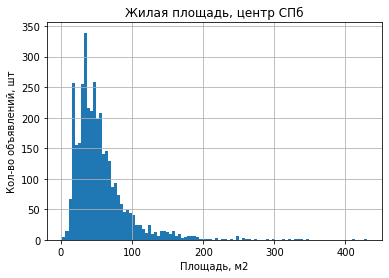

In [26]:
only_spb_center.hist('living_area', bins = 100) #изучаем площадь для жилья
plt.title('Жилая площадь, центр СПб') #назовем график
plt.ylabel('Кол-во объявлений, шт') #назовем сторону y
plt.xlabel('Площадь, м2') #назовем сторону x
only_spb_center['living_area'].describe()

Средний метраж, продаваемых квартир в Санкт-Петербурге равен 55 кв м; минимальная квартира - 2 кв м, а самая большая 430 кв м. 
Больше всего опубликованных объявлений имеют площадь от 31 до 67 кв м

count    3.525000e+03
mean     1.489553e+07
std      2.432091e+07
min      1.600000e+06
25%      6.690000e+06
50%      9.200000e+06
75%      1.450000e+07
max      7.630000e+08
Name: last_price, dtype: float64

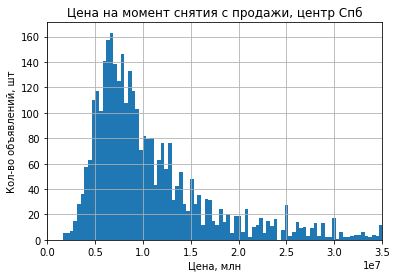

In [27]:
only_spb_center.hist('last_price', bins = 2000) #изучаем стоимость квартиры  в центре Санкт-Петерубурга
plt.xlim(0,35000000)
plt.title('Цена на момент снятия с продажи, центр Спб') #назовем график
plt.ylabel('Кол-во объявлений, шт') #назовем сторону y
plt.xlabel('Цена, млн') #назовем сторону x
only_spb_center['last_price'].describe()

Средний цена, продаваемых квартир в Санкт-Петербурге составляет  14,8 млн рублей. Норма же находится в диапазоне от 6,7 млн до 14,5 млн р. Что на порядок выше, значений по всеми Санкт-Петербургу и опласти. 

count    3525.000000
mean        2.834326
std         1.449808
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

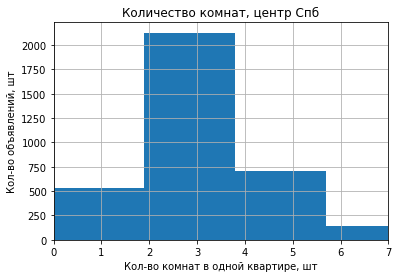

In [28]:
only_spb_center.hist('rooms', bins = 10) #изучаем кол-во комнат в центре Санкт-Петерубурга
plt.xlim(0,7)
plt.title('Количество комнат, центр Спб') #назовем график
plt.ylabel('Кол-во объявлений, шт') #назовем сторону y
plt.xlabel('Кол-во комнат в одной квартире, шт') #назовем сторону x
only_spb_center['rooms'].describe()

В среднем в центре Санктр-Петербрурга квартиры с 3мя комнатами.Здесь же располагается и рекордсмен с 19ю комнатами. 

count    2286.000000
mean        3.118609
std         0.871873
min         2.400000
25%         2.830000
50%         3.000000
75%         3.300000
max        32.000000
Name: ceiling_height, dtype: float64

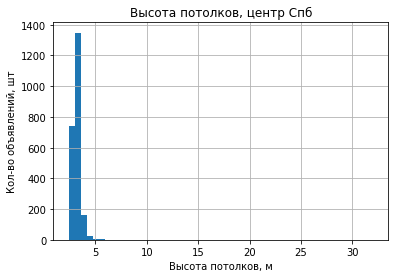

In [29]:
only_spb_center.hist('ceiling_height', bins = 50) #изучаем высоту потолков в центре Санкт-Петербурга
plt.title('Высота потолков, центр Спб') #назовем график
plt.ylabel('Кол-во объявлений, шт') #назовем сторону y
plt.xlabel('Высота потолков, м') #назовем сторону x
only_spb_center['ceiling_height'].describe()

Средняя высота потолков продаваемых квартир составляет 3,1 м, норма вцелом находится от 2,8 до 3,3 м. 

In [30]:
#строим матрицу корреляции между показателями в центре Санкт-Петербурга
only_spb_center[['last_price','rooms','cityCenters_nearest_km', 'floor_name', 'weekday_exposition', 'month_exposition','year_exposition',]].corr()

,last_price,rooms,cityCenters_nearest_km,floor_name,weekday_exposition,month_exposition,year_exposition
last_price,1.000000,0.314874,-0.040549,0.036525,0.028284,-0.012761,-0.047101
rooms,0.314874,1.000000,-0.156661,0.020311,-0.007036,-0.026147,-0.066291
cityCenters_nearest_km,-0.040549,-0.156661,1.000000,0.101927,0.010880,0.000960,0.035943
floor_name,0.036525,0.020311,0.101927,1.000000,-0.001672,-0.002417,-0.030068
weekday_exposition,0.028284,-0.007036,0.010880,-0.001672,1.000000,0.025350,0.002352
month_exposition,-0.012761,-0.026147,0.000960,-0.002417,0.025350,1.000000,-0.243528
year_exposition,-0.047101,-0.066291,0.035943,-0.030068,0.002352,-0.243528,1.000000


Цена квартиры в Центре Санкт-Петербурга зависит на 31,4% от кол-ва комнат и всего на 4% от близости к самому центру города. Этаж также не столь важен (3,6%). При это Цена квартиры имеет обратную зависимость с годом продажи (в 4,7%), то есть с годами квартиры дешевеют. 

### Вывод 

Сравнивая центр Санкт-Петербурга с аналогичными данными всего Санкт-Петербурга и области, можно сделать вывод, что цена квартиры в центре меньше зависит(на 3,6%) от кол-ва комнат, здесь не столь важно фактическое расположение дома в рамках этих 7ми килломентров, но при этом здесь жилье немного быстрее дешевеет (на 0,4%).

### Шаг 5. Общий вывод

Рыночная стоимость жилья в Санкт-Петерубрге и Лен.области зависит от следующих параметров:
1. От жилой площади квартиры на 58,6%
2. От кол-ва комнат на 36,3%
3. От близости к центру на 20,7% (чем ближе к центру, тем выше цена. Центром города в Санкт-Петербурге можно считать территорию в радиусе до 7 км включительно)
4. От этажа на 4% (при этом, если квартира будет располагаться не на 1ом этаже, то цена будет зависеть на 8% от этажа)

Средняя квартира в ЛО и Санкт-Петербурге - это 2х комнатная квартира площадью 30 м2, ценой в 6,5 млн р, высотой потолков в 2,7 м, проданная за 95 дней.

Больше всего дорогово жилья располагается в центре Санкт-Петербурга, где средняя цена составляет 14,8 млн рублей, за которую можно купить трехкомнатную квартиру с высотой потолков в 3,1 м и жилой площадью в 55 м2.

Также стоит отметить, что в центре Санкт-Петербурга жилье немного быстрее дешевеет (на 0,4%), чем вцелом по Санкт-Петербургу и Лен.области. 